# Aim

This project looks at buiding a models to classify a cat breed. The model will then be used by a cat calssification web application which will rasie awareness for cat adoption

The project will begin by loading in the dataset of cat breeds gotten from https://www.kaggle.com/crawford/cat-dataset

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

/Users/bunmiaworanti/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Data Stats

In [5]:
data_stats = pd.read_csv('data/data/cats.csv')

In [6]:
data_stats.head(10)

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
5,5,46503423,https://www.petfinder.com/cat/dakota-46503423/...,Cat,Young,Male,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
6,6,46499754,https://www.petfinder.com/cat/triscuit-4649975...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
7,7,46463847,https://www.petfinder.com/cat/kingston-4646384...,Cat,Adult,Male,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
8,8,46434624,https://www.petfinder.com/cat/exy-46434624/tx/...,Cat,Baby,Female,Small,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
9,9,46378434,https://www.petfinder.com/cat/dusty-46378434/i...,Cat,Baby,Male,Small,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [7]:
data_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67145 entries, 0 to 67144
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  67145 non-null  int64 
 1   id          67145 non-null  int64 
 2   url         67145 non-null  object
 3   type        67145 non-null  object
 4   age         67145 non-null  object
 5   gender      67145 non-null  object
 6   size        67145 non-null  object
 7   coat        42012 non-null  object
 8   breed       67145 non-null  object
 9   photos      67145 non-null  object
 10  med_photos  67145 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.6+ MB


In [8]:
data_stats.describe()

,Unnamed: 0,id
count,67145.000000,6.714500e+04
mean,35788.295003,4.044119e+07
std,20523.476522,7.418863e+06
min,0.000000,6.251749e+06
25%,18424.000000,3.557538e+07
50%,35223.000000,4.429353e+07
75%,53739.000000,4.624314e+07
max,70988.000000,4.681097e+07


In [9]:
data_stats['gender'].astype('category')
data_stats['age'].astype('category')
data_stats['breed'].astype('category').head(10)

0    Abyssinian
1    Abyssinian
2    Abyssinian
3    Abyssinian
4    Abyssinian
5    Abyssinian
6    Abyssinian
7    Abyssinian
8    Abyssinian
9    Abyssinian
Name: breed, dtype: category
Categories (67, object): [Abyssinian, American Bobtail, American Curl, American Shorthair, ..., Turkish Angora, Turkish Van, Tuxedo, York Chocolate]

In [10]:
data_stats[['breed', 'id']].groupby(['breed'], as_index=False).count().sort_values(by='id', ascending=False)

,breed,id
25,Domestic Short Hair,4049
44,Persian,3999
23,Domestic Long Hair,3967
3,American Shorthair,3964
24,Domestic Medium Hair,3819
...,...,...
19,Cymric,17
12,Burmilla,8
14,Canadian Hairless,4
17,Chinchilla,3


In [11]:
data_stats[['breed', 'id']].groupby(['breed'], as_index=False).count().sort_values(by='id', ascending=False).describe()

,id
count,67.000000
mean,1002.164179
std,1254.307096
min,1.000000
25%,107.000000
50%,258.000000
75%,1621.500000
max,4049.000000


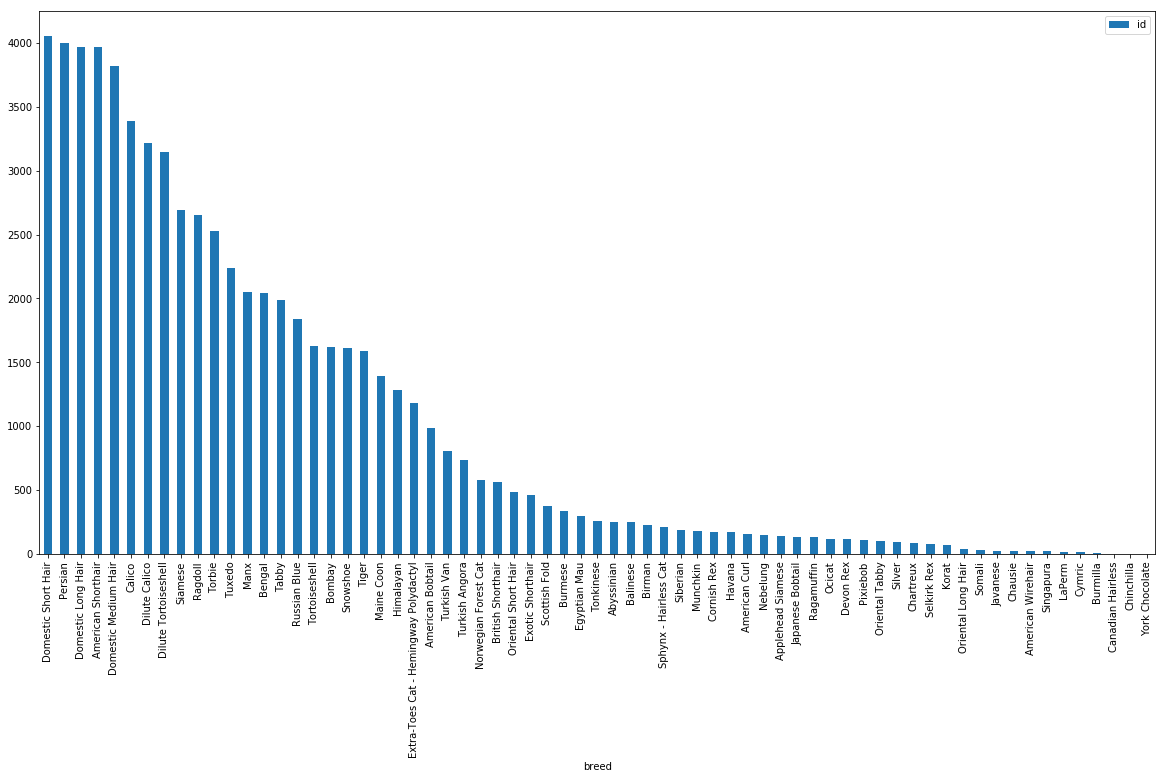

In [12]:
ax = data_stats[['breed', 'id']].groupby(['breed'], as_index=False).count().sort_values(by='id', ascending=False).plot.bar(x='breed', y='id',  figsize=(20, 10))

In [13]:
data_stats[['gender', 'id']].groupby(['gender'], as_index=False).count().sort_values(by='id', ascending=False)

,gender,id
0,Female,40667
1,Male,26476
2,Unknown,2


In [14]:
data_stats[['age', 'id']].groupby(['age'], as_index=False).count().sort_values(by='id', ascending=False)

,age,id
1,Baby,24663
0,Adult,22910
3,Young,16624
2,Senior,2948


In [15]:
data_stats[['type', 'id']].groupby(['type'], as_index=False).count().sort_values(by='id', ascending=False)

,type,id
0,Cat,67145


## Load Data

In [16]:
data_dir_str = 'data/images/'
data_dir = pathlib.Path(data_dir_str)
image_count = len(list(data_dir.glob('*/*.jpg')))
print('image count',image_count)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
print('class count',len(CLASS_NAMES))
CLASS_NAMES

image count 126607
class count 68


array(['Chausie', 'Ocicat', 'Himalayan', 'Burmese', 'Tortoiseshell',
       'Selkirk Rex', 'Chinchilla', 'Birman', 'American Shorthair',
       'Egyptian Mau', 'Siberian', 'LaPerm', 'Balinese', 'Dilute Calico',
       '.DS_Store', 'Sphynx - Hairless Cat', 'Turkish Van',
       'American Bobtail', 'Manx',
       'Extra-Toes Cat - Hemingway Polydactyl', 'Cornish Rex',
       'Devon Rex', 'Korat', 'Ragdoll', 'Abyssinian', 'Silver', 'Tiger',
       'Siamese', 'Maine Coon', 'York Chocolate', 'Bengal', 'Torbie',
       'Scottish Fold', 'Turkish Angora', 'Snowshoe', 'Javanese',
       'Tuxedo', 'Nebelung', 'British Shorthair', 'Canadian Hairless',
       'Oriental Short Hair', 'Tonkinese', 'Ragamuffin', 'Bombay',
       'Havana', 'Singapura', 'Dilute Tortoiseshell',
       'Domestic Medium Hair', 'Domestic Short Hair', 'American Curl',
       'Somali', 'Applehead Siamese', 'Munchkin', 'Oriental Tabby',
       'Burmilla', 'Russian Blue', 'Calico', 'Persian', 'Chartreux',
       'Exotic Shortha

In [17]:
# data_dir = pathlib.Path('data')
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir_str),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                    subset='training')
validation_data_gen = image_generator.flow_from_directory(directory=str(data_dir_str),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                   subset='validation')

Found 101313 images belonging to 68 classes.
Found 25294 images belonging to 68 classes.


In [18]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(12,12))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(8,4,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

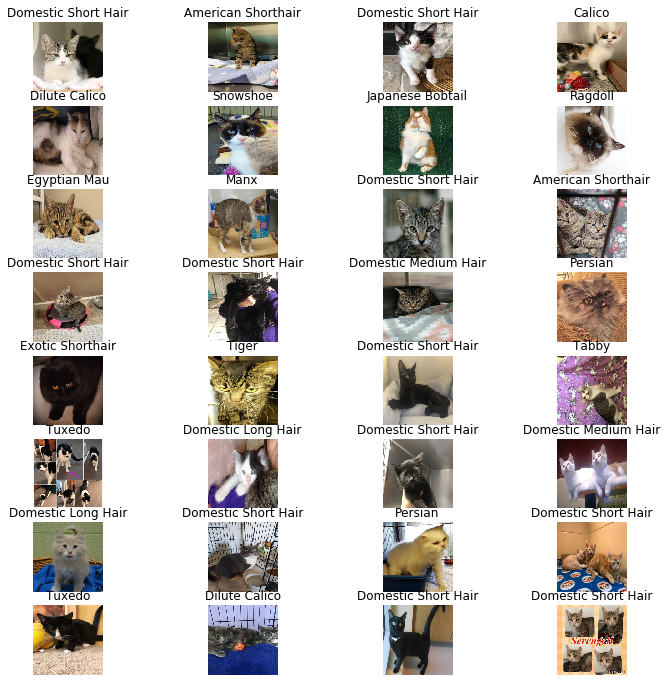

In [19]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

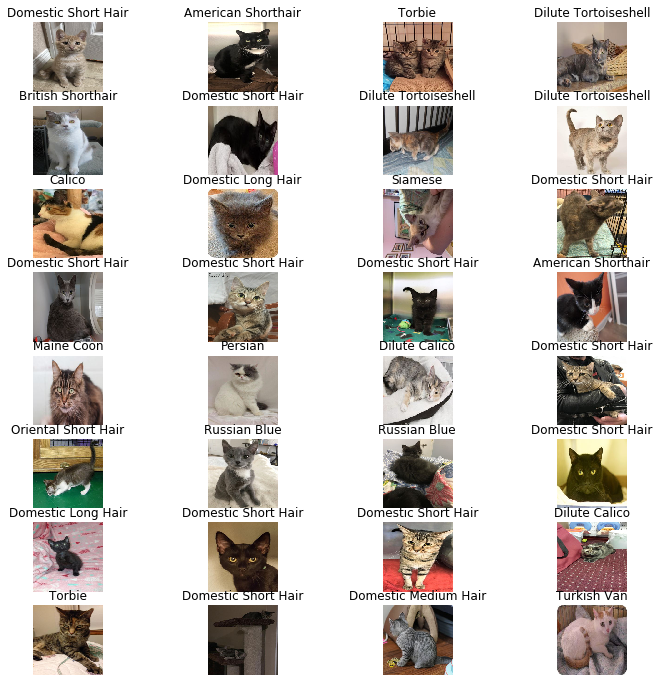

In [20]:
image_batch, label_batch = next(validation_data_gen)
show_batch(image_batch, label_batch)